# How love is generated

In this notebook, we will implement a new tindar problem generation functionality.

We assume that:

1) Some people are more attractive than others. This is described by column parameter nu_j, where higher nu's indicate a more attractive person. (j=1,...,n) <br>
2) The more attractive you are, the less easy you will be attracted to others, and vice versa.<br>

To come up with something realistic I simply plotted some graphs on https://rechneronline.de/function-graphs/, and came up with:

romance_level = (1/(attractiveness_level+1))**1.5- 0.2


In [1]:
import numpy as np
import matplotlib.pyplot as plt

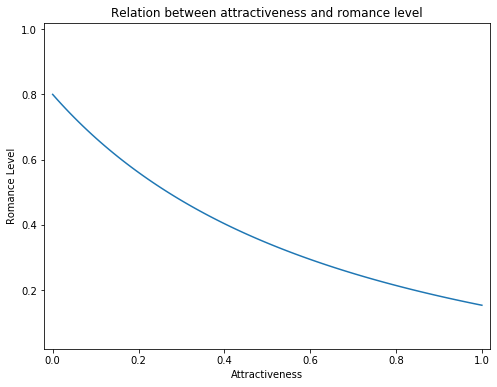

In [2]:
romance_level_fn = lambda attractiveness_level: (1/(attractiveness_level+1))**1.5- 0.2
attractiveness_levels = np.linspace(0, 1, 100)

romance_levels = [romance_level_fn(a) for a in attractiveness_levels]

plt.figure(figsize=(8,6))
plt.title("Relation between attractiveness and romance level")
plt.xlabel("Attractiveness")
plt.ylabel("Romance Level")
plt.plot(attractiveness_levels, romance_levels)
plt.ylim(top=1.02, bottom=0.02)
plt.xlim(right=1.02, left=-0.02)
plt.show()

## Furthermore, we assume that about attractiveness that

- it is normally distributed among people with some mean and standard deviation
- it is the driver for the romance level

In [3]:
N = 10
# NU_BASE = 0.5
# SIGMA_COL_BASE = 0.2

In [4]:
# nu = np.random.normal(NU_BASE, SIGMA_COL_BASE, size=N)
nu = np.random.uniform(low=0, high=1, size=N)
nu[nu < 0] = 0
nu[nu > 1] = 1

mu = np.array([romance_level_fn(n) for n in nu])
mu[mu < 0] = 0
mu[mu > 1] = 1

# print(f"mu: {mu}")
# print(f"nu: {nu}")

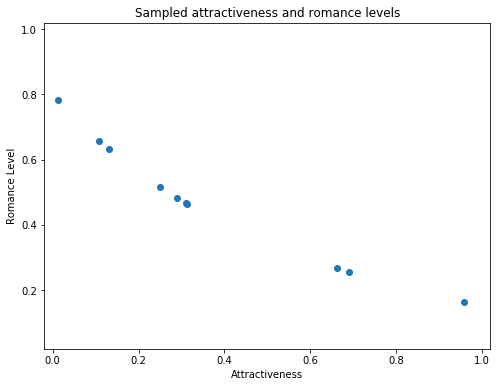

In [5]:

plt.figure(figsize=(8,6))
plt.title("Sampled attractiveness and romance levels")
plt.xlabel("Attractiveness")
plt.ylabel("Romance Level")
plt.scatter(x=nu, y=mu)
plt.ylim(top=1.02, bottom=0.02)
plt.xlim(right=1.02, left=-0.02)
plt.show()

In [6]:
mu_colvec = mu.reshape((-1, 1))
nu_rowvec = nu.reshape((1, -1))

love_values = np.dot(mu_colvec, nu_rowvec)
love_values

array([[0.12921457, 0.49309518, 0.00607265, 0.16122211, 0.0675387 ,
        0.3412161 , 0.14944109, 0.05537927, 0.15948069, 0.35522399],
       [0.04141379, 0.158039  , 0.00194631, 0.05167234, 0.02164643,
        0.10936114, 0.04789647, 0.01774928, 0.05111421, 0.11385073],
       [0.19649718, 0.74985206, 0.0092347 , 0.24517118, 0.10270641,
        0.51888886, 0.22725573, 0.08421551, 0.242523  , 0.54019073],
       [0.11661951, 0.44503124, 0.00548072, 0.14550715, 0.06095544,
        0.30795642, 0.13487447, 0.04998123, 0.14393547, 0.3205989 ],
       [0.15847268, 0.60474695, 0.00744768, 0.1977277 , 0.08283152,
        0.41847782, 0.1832791 , 0.06791883, 0.19559197, 0.43565753],
       [0.06685869, 0.25513919, 0.00314213, 0.08342016, 0.03494613,
        0.17655334, 0.07732438, 0.02865455, 0.08251911, 0.18380135],
       [0.12107907, 0.46204934, 0.00569031, 0.15107138, 0.06328639,
        0.31973274, 0.1400321 , 0.05189253, 0.1494396 , 0.33285868],
       [0.16518623, 0.63036649, 0.0077632

In [7]:
love_values_scaled = (love_values - love_values.min())/(love_values.max() - love_values.min())

assert love_values_scaled.max() == 1
assert love_values_scaled.min() == 0

In [8]:
love_matrix = love_values_scaled.copy()
love_matrix[love_matrix > 0.5] = 1
love_matrix[love_matrix <= 0.5] = 0

print(love_matrix.mean())

0.13


## What is the relation between the distribution of attractiveness and the number of people who like each other?

- uniform distribution: different values of low and high
- normal distribution: different values of mu and sigma

In [9]:
# TODO